In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definisco le funzioni

In [3]:
def numerov(k2, h, ya, yb, direction='forward', jump_a = False):
    """
    Algoritmo di numerov
    """
    
    M=len(k2)
    if jump_a:
        M=M+1
    
    y=np.zeros(M)
    
    # FORWARD NUMEROV ALGORYTM
    if direction=='forward':
        #initial conditions
        y[0]=ya
        y[1]=yb
        #algorytm
        for i in range(1,M-1):
            if y[i]< abs(np.inf):
                y[i+1] = (y[i] * (2- 5*h**2/6 * k2[i]) - y[i-1] * (1 + h**2/12 * k2[i-1]) ) / (1 + h**2/12 * k2[i+1])
            else:
                y[i+1]=y[i]
                
    # BACKWORD NUMEROV ALGORYTM
    if direction=='backward':
        y=np.zeros(M)
        #initial conditions
        y[M-1]=ya
        y[M-2]=yb
        #algorytm
        for i in range(M-2,0,-1):
            if y[i]< abs(np.inf):
                y[i-1] = (y[i] * (2- 5*h**2/6 * k2[i]) - y[i+1] * (1 + h**2/12 * k2[i+1]) ) / (1 + h**2/12 * k2[i-1])
            else:
                y[i-1]=y[i]
    return y

In [125]:
def root_finder(f, begin, end, step, tol):
    """
    find roots of a function
    """
    # coarse find of roots
    E=np.arange(begin,end,step)
    yM=f(E)
    
    root_bound=[]
    for i in range(1,len(E)):
        if np.sign(yM[i]) != np.sign(yM[i-1]):
            root_bound.append([i-1,i])

    # finer find of roots
    roots=[]
    for k in root_bound:
        E_p=E[k[1]]
        E_m=E[k[0]]
        n_iter=0
        #while (abs((E_p-E_m)/(E_p+E_m)*2)>tol)&(n_iter<100):
        while (abs((E_p-E_m)/2)>tol)&(n_iter<100):
            E_temp=(E_p+E_m)/2
            if np.sign(f(E_m)) != np.sign(f(E_temp)):
                E_p = E_temp
            if np.sign(f(E_temp)) != np.sign(f(E_p)):
                E_m = E_temp
            n_iter=n_iter+1
        roots.append([(E_p+E_m)/2, E_p-E_m])

    return roots

# Esercizio punto 1

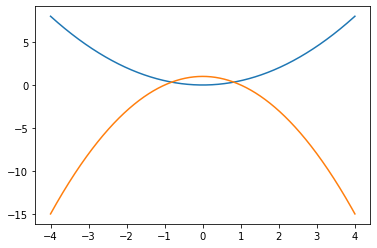

In [144]:
# MASH
h=0.0001
x=np.arange(-3.75,3.75,h)
x=np.arange(-4,4,h)
M=len(x)

# POTENTIAL
V = lambda x : x**2/2

k2 = lambda E : 2 * (E - V(x))

plt.plot(x,V(x))
plt.plot(x,k2(0.5))


In [145]:
# dobbiamo creare una funzione dell'energia y_M(E)
yM = np.vectorize(lambda E : (numerov(k2(E),h,0,h)[M-1]))

eigenvalues = root_finder(yM, 0, 5, 0.1, 0.0001)

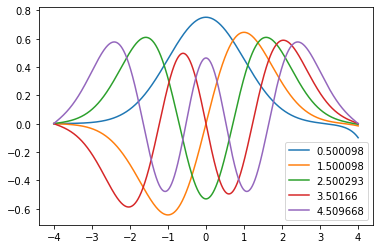

In [146]:
for En in enumerate(np.array(eigenvalues)[:,0]):
    y = (-1)**(En[0]) * numerov(k2(En[1]),h,0,h)
    y = y/np.sqrt(np.sum(y**2*h))
    plt.plot(x,y,label=str(round(En[1],6)))
plt.legend()

# Esercizio 2

In [202]:
# MASH
h=0.001
r=np.arange(0,4,h)
M=len(r)

# POTENTIAL
V = lambda r : r**2/2


def k2_temp(E,l,V,r):
    out=(2 * (E - V(r[1:])) - (l+1)*l/r[1:]**2)
    return np.append([0],out)


k2 = lambda E , l : k2_temp(E, l, V, r)


In [207]:
l=1

# dobbiamo creare una funzione dell'energia y_M(E)
yM = np.vectorize(lambda E : (numerov(k2(E,l),h,0,h**(l+1))[M-1]))

eigenvalues = root_finder(yM, 0, 7, 0.1, 0.0001)

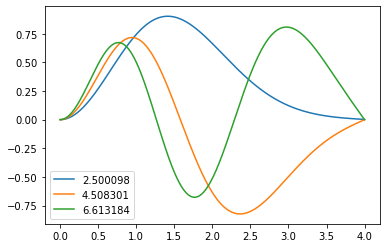

In [208]:
for En in enumerate(np.array(eigenvalues)[:,0]):
    y = numerov(k2(En[1],l),h,0,h)
    y = y/np.sqrt(np.sum(y**2*h))
    plt.plot(r,y,label=str(round(En[1],6)))
plt.legend()